# Titanic competition

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import polars as pl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input
./kaggle/input\gender_submission.csv
./kaggle/input\test.csv
./kaggle/input\test_sampled.csv
./kaggle/input\titanic.zip
./kaggle/input\train.csv
./kaggle/input\train_sampled.csv


In [31]:
import glob
from sklearn.model_selection import train_test_split, cross_val_score

df = pl.read_csv('./kaggle/input/train.csv')
splits = train_test_split(df, test_size=0.25, random_state=0, shuffle=True, stratify=df.select("Survived"),)
train: pl.DataFrame = splits[0]
test: pl.DataFrame = splits[1]

if len(glob.glob('**/train_sampled.csv', recursive=True)) == 0:
    train.write_csv('./kaggle/input/train_sampled.csv')
    test.write_csv('./kaggle/input/test_sampled.csv')

In [33]:
train.numeral(

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
672,0,1,"""Davidson, Mr. …","""male""",31.0,1,0,"""F.C. 12750""",52.0,"""B71""","""S"""
418,1,2,"""Silven, Miss. …","""female""",18.0,0,2,"""250652""",13.0,null,"""S"""
635,0,3,"""Skoog, Miss. M…","""female""",9.0,3,2,"""347088""",27.9,null,"""S"""
324,1,2,"""Caldwell, Mrs.…","""female""",22.0,1,1,"""248738""",29.0,null,"""S"""
380,0,3,"""Gustafsson, Mr…","""male""",19.0,0,0,"""347069""",7.775,null,"""S"""
251,0,3,"""Reed, Mr. Jame…","""male""",null,0,0,"""362316""",7.25,null,"""S"""
652,1,2,"""Doling, Miss. …","""female""",18.0,0,1,"""231919""",23.0,null,"""S"""
75,1,3,"""Bing, Mr. Lee""","""male""",32.0,0,0,"""1601""",56.4958,null,"""S"""
219,1,1,"""Bazzani, Miss.…","""female""",32.0,0,0,"""11813""",76.2917,"""D15""","""C"""


In [6]:

df = pl.read_csv('./kaggle/input/train.csv')
test = splits[0], splits[1]


    
data: pd.DataFrame = pd.read_csv('./kaggle/input/train_sampled.csv').drop('PassengerId', axis=1)

numeric_cols = ['Age', 'Fare','Survived']
categorical_cols = data.columns.difference(numeric_cols)

data[categorical_cols] = data[categorical_cols].astype('category')

In [7]:
data[numeric_cols].describe()

,Age,Fare,Survived
count,532.000000,668.000000,668.000000
mean,29.796842,33.273328,0.383234
std,14.477953,53.472183,0.486539
min,0.420000,0.000000,0.000000
25%,20.000000,7.925000,0.000000
50%,29.000000,14.454200,0.000000
75%,38.000000,30.500000,1.000000
max,80.000000,512.329200,1.000000


In [8]:
data[categorical_cols].describe()

,Cabin,Embarked,Name,Parch,Pclass,Sex,SibSp,Ticket,Unnamed: 0
count,153,666,668,668,668,668,668,668,668
unique,120,3,668,7,3,2,7,537,668
top,B96 B98,S,"Abbott, Mr. Rossmore Edward",0,3,male,0,347088,1
freq,3,487,1,513,366,433,462,6,1


<Axes: >

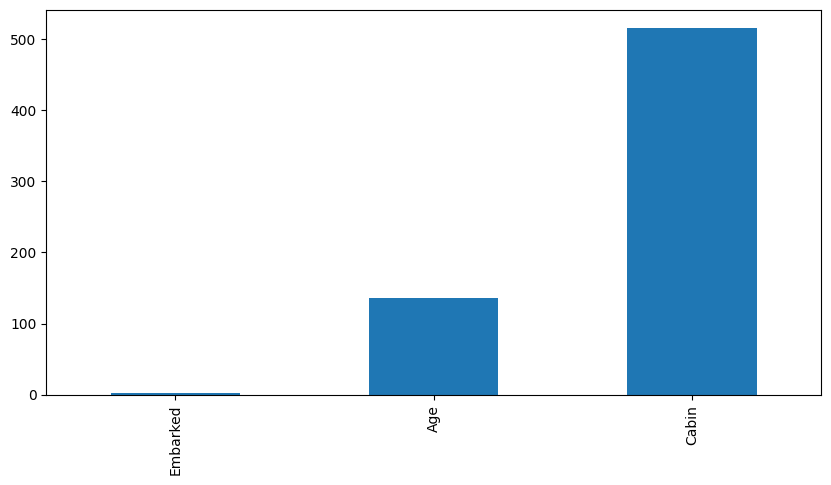

In [9]:
nans = data.isna().sum().sort_values()

plt.rcParams['figure.figsize'] = (10, 5)
nans.loc[nans > 0].plot.bar()

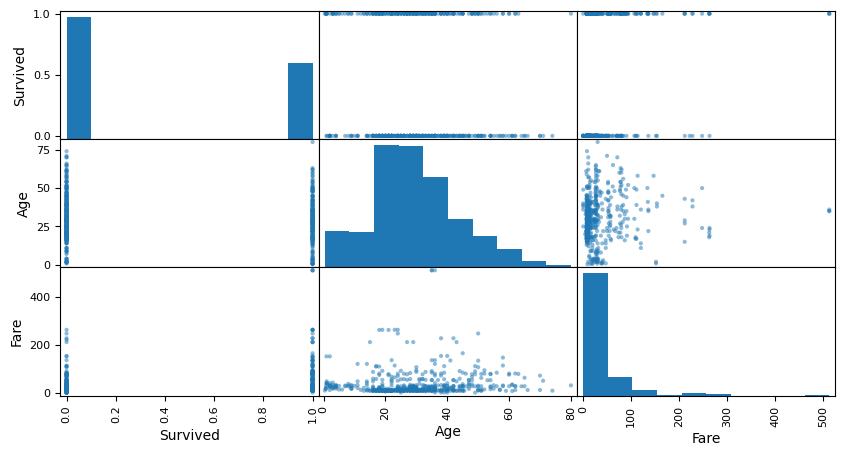

In [10]:
pd.plotting.scatter_matrix(data)
plt.show()

In [11]:
data.groupby('Fare_binning', as_index =False).sum()

KeyError: 'Fare_binning'

In [ ]:
data.groupby('Fare_binning', as_index =False).count()

KeyError: 'Fare_binning'

In [ ]:
data['Fare_binning'] = pd.cut(data.Fare, 100)
(data.groupby('Fare_binning', as_index =False).sum()[['Survived']] / data.groupby('Fare_binning', as_index =False).count()[['Survived']]).reset_index().plot.scatter('index', 'Survived')

TypeError: category type does not support sum operations

In [ ]:
df_age_category = pd.merge(data, pd.cut(data['Age'], 15, precision = 0).dropna().rename('Age_category'), how='left', left_index =True, right_index=True) 

df_age_category.query('Sex == "male"')[['Age_category', 'Parch']].groupby('Age_category').agg(['unique']) # .plot.bar(x='Age_category', stacked=True)

,Parch
,unique
Age_category,
"(0.0, 6.0]","[1, 2] Categories (7, int64): [0, 1, 2, 3, 4, ..."
"(6.0, 11.0]","[2, 0, 1] Categories (7, int64): [0, 1, 2, 3, ..."
"(11.0, 16.0]","[1, 0, 2] Categories (7, int64): [0, 1, 2, 3, ..."
"(16.0, 22.0]","[0, 1, 2] Categories (7, int64): [0, 1, 2, 3, ..."
"(22.0, 27.0]","[0, 1, 2] Categories (7, int64): [0, 1, 2, 3, ..."
"(27.0, 32.0]","[0, 2, 1] Categories (7, int64): [0, 1, 2, 3, ..."
"(32.0, 38.0]","[0, 1, 2] Categories (7, int64): [0, 1, 2, 3, ..."
"(38.0, 43.0]","[0, 1, 4, 5] Categories (7, int64): [0, 1, 2, ..."


In [12]:
data

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,671,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,417,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S
2,634,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
3,323,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
4,379,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
663,131,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
664,490,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
665,528,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
666,48,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C


In [13]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, specs=[[{"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=["didn't survive", "survived"], values=data.Survived.value_counts(), title='rate of survival'),
    row=1, col=1
)

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Kpis")
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# simplest model possible

In [17]:
import mlflow
from mlflow import log_metric, log_param, log_params, log_artifacts
from mlflow.models.signature import infer_signature
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

with mlflow.start_run() as run:    
    X = data.drop(['Survived', 'Name'], axis=1).iloc[:, :-1].dropna(axis=1)
    y = data.Survived

    categorical_cols = X.columns.difference(numeric_cols)

    estimators = [
    (
        'categorical_cols', 
        ColumnTransformer(
            [(
                'ordinalEn',
                OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
                categorical_cols
                )]
        )
    ),
    ('imputer', SimpleImputer()),
    (
        'clf', LogisticRegression()
    )
    ]
    pipe = Pipeline(estimators)

    pipe.fit(X, y)
    predictions = pipe.predict(X)
    log_metric("c", float(pipe.score(X, y)))
    #signature = infer_signature(X, predictions)
    mlflow.sklearn.log_model(pipe, "models")

    print("Run ID: {}".format(run.info.run_id))


c:\Users\gaetd\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-titanic-xNW5dI96-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Run ID: fa8422c1982744578ccd86e1cd108c2d


In [23]:
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

model = mlflow.sklearn.load_model("runs:/fa8422c1982744578ccd86e1cd108c2d/models")
predictions = model.predict(X)
print(predictions)

[0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 